**TASK 3 :**

# **💲SALES PREDICTION using PYTHON.**

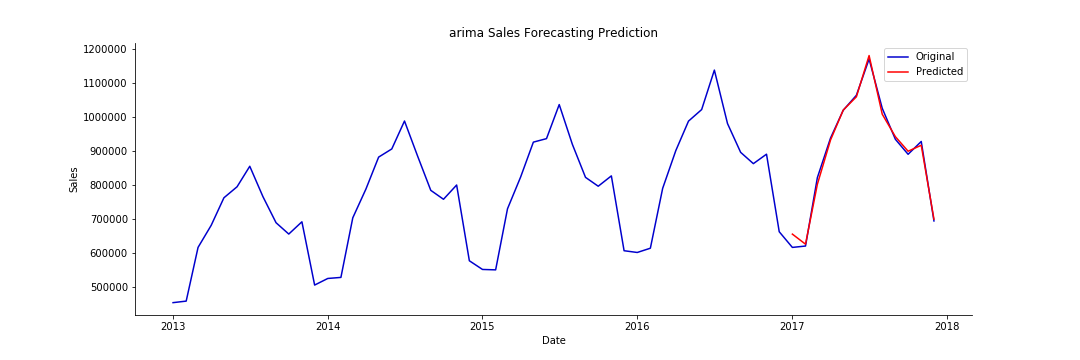

Sales prediction using Python involves utilizing Python programming language and machine learning techniques to analyze historical sales data, build predictive models, and forecast future sales trends, helping businesses make data-driven decisions.

---
INPUT TO THE MODEL :
1. tv
2. Radio
3. Newspaper

OUTPUT FROM THE MODEL :
Sales Forecast

---
---



**IMPORTING LIBRARIES :**
1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sns
%matplotlib inline

IMPORTING DATASET 📄:

In [28]:
dataset=pd.read_csv('sales_dataset.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [30]:
dataset.shape

(200, 5)



---



**VISUALIZATION OF DATASET**

Visualization of a dataset is crucial as it provides a clear and intuitive way to explore patterns, trends, and relationships within the data, helping analysts and decision-makers gain valuable insights quickly and make informed data-driven choices.

In [31]:
# sns.pairplot(dataset, hue='Sales')

In [32]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

OUTLIER REMOVAL :

<Axes: >

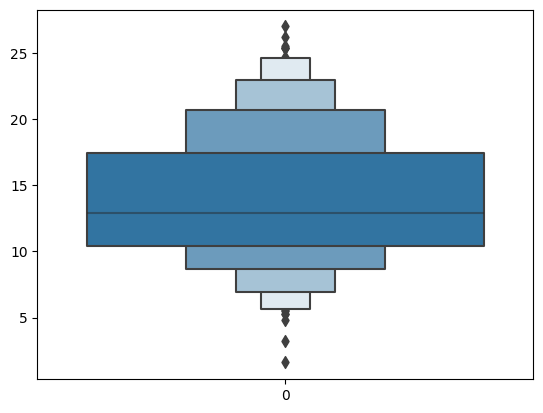

In [33]:
sns.boxenplot(dataset['Sales'])

Now, we can see 3 value is Varrying drastically. So it will be better to not take it into consideratio. otherwise it will make impact on mean, deviation and etc, parameters.

In [34]:
sorted(dataset['Sales'])[:10]

[1.6, 3.2, 4.8, 5.3, 5.3, 5.5, 5.6, 5.7, 5.9, 6.6]

In [35]:
dataset[(dataset['Sales']<5.3)]

,Unnamed: 0,TV,Radio,Newspaper,Sales
8,9,8.6,2.1,1.0,4.8
130,131,0.7,39.6,8.7,1.6
155,156,4.1,11.6,5.7,3.2


Going to remove this OUTIER :

In [36]:
dataset=dataset[~(dataset['Sales']<5.3)]

Removed..

In [37]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


LET'S CHECK IT M=ONCE AGAIN NOW :

<Axes: >

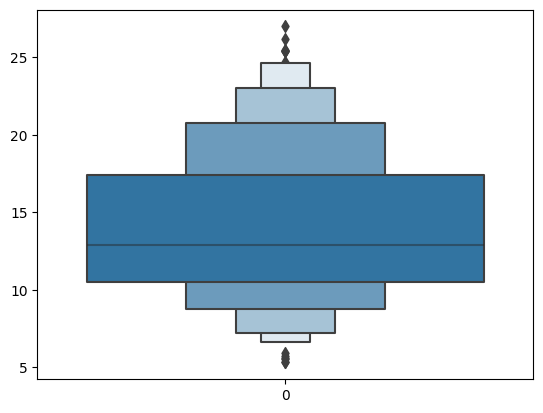

In [38]:
sns.boxenplot(dataset['Sales'])

Its Fine now.



---



**STORE FEATURE MATRIX (INPUT COLUMNS) & RESPONSE(TARGET)(ACTUAL OUTPUT) :**

The store feature matrix (input columns) contains the data attributes used for training a machine learning model, shaping its ability to make accurate predictions, while the response or target variable (actual output) is what the model aims to predict, making it the focal point for model training and evaluation, thus directly impacting the model's performance and utility.

In [39]:
data = dataset.values

input = data[:,1:4]
output = data[:,4]

# print(input)
print(output)

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2 10.6  8.6 17.4  9.2  9.7 19.
 22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9 18.9
 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1 20.7
 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7  5.5
 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3 18.3
 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6 21.7
 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5 25.4
 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8 14.1
 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6  6.6
  8.8 24.7  9.7 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7 10.9 19.2
 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.  15.6 15.3
 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2 17.1 15.   8.4
 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2  8.7 26.2 17.6
 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6  9.7 12.8 25.5
 13.4]




---

**SPLITTING DATASET INTO TRAINING & TESTING SETS :**

Splitting a dataset into training and testing sets is vital as it allows for model evaluation and validation. The training set helps the model learn patterns, while the testing set assesses its ability to generalize to unseen data, ensuring the model's reliability and performance.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
inputTRAIN, inputTEST, outputTRAIN, outputTEST = train_test_split(input, output, test_size=0.2)

In [42]:
# print(inputTRAIN)
# print(inputTEST)
# print(outputTRAIN)
# print(outputTEST)



---



# **MODEL**

IMPORTING ALGORITHMS FROM LIBRARIES :

In [43]:
 from sklearn.linear_model import LinearRegression
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.ensemble import GradientBoostingRegressor
 from xgboost import XGBRegressor

**TRAINNING TO THE MODELS :**

In [44]:
# TRAINNING LinearRegression MODEL :
LR_Model = LinearRegression()
LR_Model.fit(inputTRAIN, outputTRAIN)

# TRAINNING RandomForestRegressor MODEL :
RFR_Model = RandomForestRegressor()
RFR_Model.fit(inputTRAIN, outputTRAIN)

# TRAINNING GradientBoostingRegressor MODEL :
GBR_Model = GradientBoostingRegressor()
GBR_Model.fit(inputTRAIN, outputTRAIN)

# TRAINNING XGBRegressor MODEL :
XGBR_Model = XGBRegressor()
XGBR_Model.fit(inputTRAIN, outputTRAIN)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**PREDICTING OUTPUT OF ALL MODELS :**

In [45]:
LR_Prediction = LR_Model.predict(inputTEST)
RFR_Prediction = RFR_Model.predict(inputTEST)
GBR_Prediction = GBR_Model.predict(inputTEST)
XGBR_Prediction = XGBR_Model.predict(inputTEST)

**ACCURACY SCORES OF EACH MODEL :**

In [46]:
from sklearn import metrics

1) LinearRegression :

In [47]:
LR_Score = metrics.r2_score(outputTEST,LR_Prediction)*100
print("LinearRegression ACCURECY : ",LR_Score)

LinearRegression ACCURECY :  89.81205367923748


2) RandomForestRegressor :

In [48]:
RFR_Score = metrics.r2_score(outputTEST,RFR_Prediction)*100
print("RandomForestRegressor ACCURECY : ",RFR_Score)

RandomForestRegressor ACCURECY :  98.83149482274023


3) GradientBoostingRegressor :

In [49]:
GBR_Score = metrics.r2_score(outputTEST,GBR_Prediction)*100
print("GradientBoostingRegressor ACCURECY : ",GBR_Score)

GradientBoostingRegressor ACCURECY :  98.74023674765124


4) XGBRegressor :

In [50]:
XGBR_Score = metrics.r2_score(outputTEST,XGBR_Prediction)*100
print("XGBRegressor ACCURECY : ",XGBR_Score)

XGBRegressor ACCURECY :  97.83037083180945




---


# **OVERALL COMARISON BETWEEN ALGORITHMS :**

In [51]:
comparison = pd.DataFrame({'MODELS': ['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor'],
                           'R2 SCORE': [LR_Score, RFR_Score, GBR_Score, XGBR_Score]})

In [52]:
comparison

,MODELS,R2 SCORE
0,LinearRegression,89.812054
1,RandomForestRegressor,98.831495
2,GradientBoostingRegressor,98.740237
3,XGBRegressor,97.830371




---

# ***THANK YOU !***